In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from torchvision.transforms import transforms
from PIL import Image
import glob

In [2]:
imgs = glob.glob(r'C:\Users\mateo\Documents\Pyronear\DS\ardeche\val\0\\*')
len(imgs)

3184

In [3]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

size = 448
train_transforms = transforms.Compose([
      transforms.RandomResizedCrop(size=size, scale=(0.8, 1.0)),
      transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.1),
      transforms.RandomHorizontalFlip(),

  ])

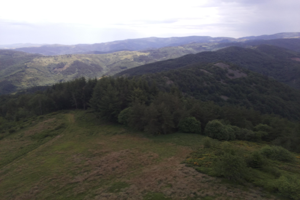

In [89]:
file = imgs[48]
im = Image.open(file)
im.resize((300,200))

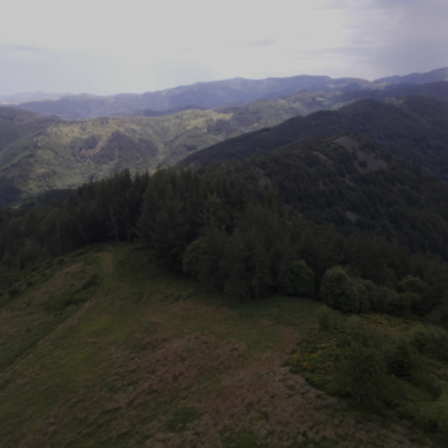

In [90]:
train_transforms(im)

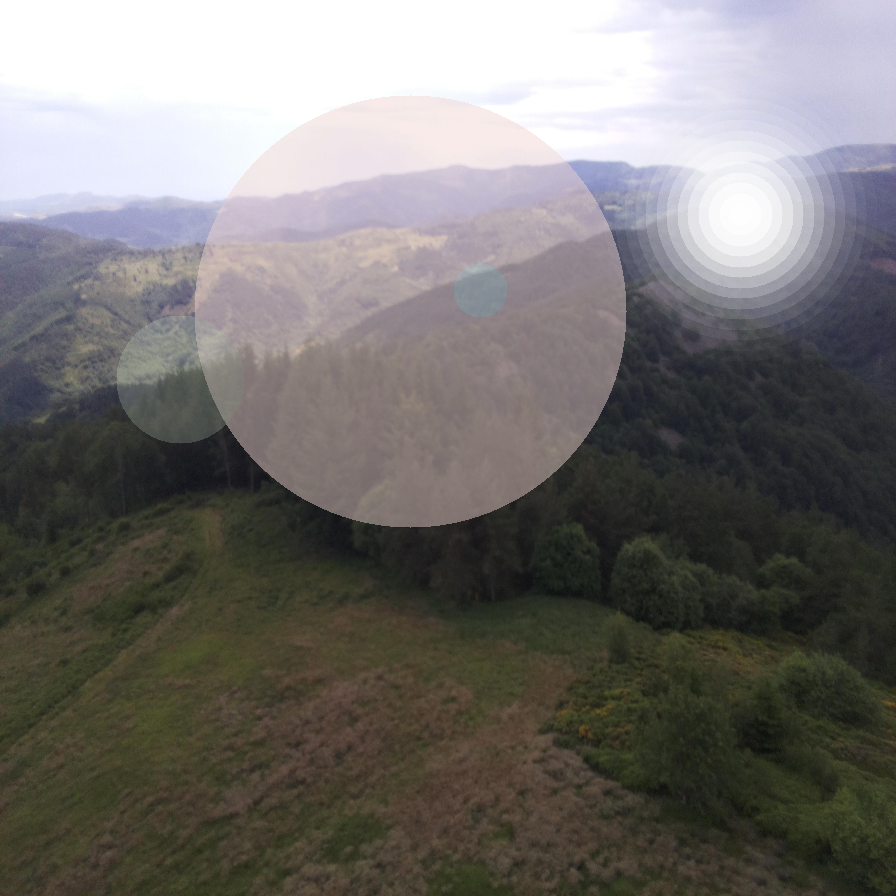

In [113]:
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.Resize(448*2,448*2),
    A.augmentations.transforms.GaussianBlur (blur_limit=(1), sigma_limit=0, always_apply=False, p=0.5),
    A.transforms.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, always_apply=False, p=0.5),
 
    A.transforms.RandomSunFlare(flare_roi=(0, 0, 1, 0.7), angle_lower=0, angle_upper=1, num_flare_circles_lower=3,
                                               num_flare_circles_upper=5, src_radius=200, src_color=(255, 255, 255), p=0.5),
    

])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread(file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]
im2 = Image.fromarray(transformed_image.astype('uint8'))
im2